<a href="https://colab.research.google.com/github/callee2006/MachineLearning/blob/master/linear_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This file contains practice examples of Linear Classifiers
	
* Logistic regression (sklearn.linear_model.LogisticRegression)

* Linear SVM classifier (sklearn.svm.LinearSVC)

(Most of the contents and code are from "Introduction to Machine Learning with Python" by Andreas C. Müller & Sarah Guido)

In [1]:
! pip install mglearn

import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import mglearn

     |████████████████████████████████| 542kB 4.9MB/s 
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Linear classification

* Binary classification

  - class +1 if $f(x) = \sum_i{w_ix_i}+b = w_1 x_1 + w_2 x_2+...+b > 0$
  - class -1 if $f(x) = \sum_i{w_ix_i}+b = w_1 x_1 + w_2 x_2+...+b < 0$

> Class boundary is hyperplane

* Multi-class classification: 

    $ŷ = argmax_j {f_j(x)}= argmax_j {(\sum_i{w_{ji} x_i} + b_j)} = argmax_j {([)w_{j1} x_1 + w_{j2} x_2+...+b_j)}$
    

* Popular fitting algorithms
  - Logistic regression (linear_model.LogisticRegression)
  - Linear SVM



In [20]:
# prepare forge dataset
X, y = mglearn.datasets.make_forge()

# split into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("X_train contains {} samples, X_test contains {} samples".format(len(X_train), len(X_test)))

X_train contains 19 samples, X_test contains 7 samples


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


Text(0, 0.5, 'Second feature')

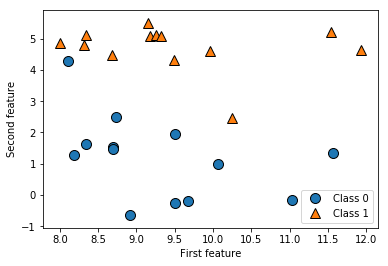

In [21]:
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")

## Logistic regression
* binary classification ($y$ = 0 or 1)
* $\hat{y} = sigmoid(\sum_i{w_ix_i+b})$
* $ Loss_{logistic} = \frac{1}{2N}(y - \hat{y})^2 + \alpha |W|_L$


See https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [3]:
from sklearn.linear_model import LogisticRegression
logi_reg = LogisticRegression().fit(X_train,y_train)

# check coefficients and intercept
print("logi_reg.coef_: ", logi_reg.coef_)               # W
print("logi_reg.intercept_:", logi_reg.intercept_)      # b

logi_reg.coef_:  [[-0.42296145  1.24488436]]
logi_reg.intercept_: [-0.26660632]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [4]:
y_pred = logi_reg.predict(X_test)
print("y_pred =", y_pred)
print("y_test =", y_test)

y_pred = [1 0 1 0 1 0 0]
y_test = [1 0 1 0 1 1 0]


In [5]:
print("Training accuracy = ", logi_reg.score(X_train, y_train))
print("Test Accuracy = ", logi_reg.score(X_test, y_test))

Training accuracy =  0.9473684210526315
Test Accuracy =  0.8571428571428571


## linear SVM classifier (LinearSVC)

In [6]:
# linear SVM classifier

from sklearn.svm import LinearSVC

linearSVC = LinearSVC().fit(X_train,y_train)
# check coefficients and intercept
print("logi_reg.coef_: ", logi_reg.coef_)               # W
print("logi_reg.intercept_:", logi_reg.intercept_)      # b

y_pred = linearSVC.predict(X_test)
print("y_pred =", y_pred)
print("y_test =", y_test)

print("Training accuracy = ", linearSVC.score(X_train, y_train))
print("Test Accuracy = ", linearSVC.score(X_test, y_test))

logi_reg.coef_:  [[-0.42296145  1.24488436]]
logi_reg.intercept_: [-0.26660632]
y_pred = [1 0 1 0 1 0 0]
y_test = [1 0 1 0 1 1 0]
Training accuracy =  0.9473684210526315
Test Accuracy =  0.8571428571428571


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


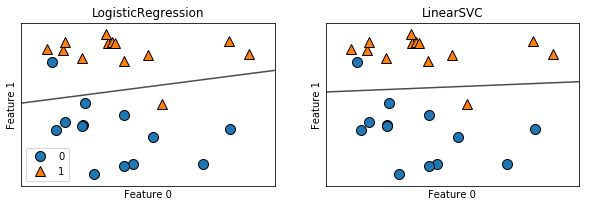

In [7]:
# Visualization (LogisticRegression vs. LinearSVC)
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LogisticRegression(),LinearSVC()], axes):
  clf = model.fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
  ax.set_title("{}".format(clf.__class__.__name__))
  ax.set_xlabel("Feature 0")
  ax.set_ylabel("Feature 1")
axes[0].legend()

## hyper parameter C to control regularization 

**small C** means **stronger regularization**

In [0]:
# prepare breast cancer dataset

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [9]:
print("X_train.shape =", X_train.shape)
print("y_train.shape =", y_train.shape)
print("X_test.shape =", X_test.shape)
print("y_test.shape =", y_test.shape)

X_train.shape = (426, 30)
y_train.shape = (426,)
X_test.shape = (143, 30)
y_test.shape = (143,)


In [10]:
# C = 1 (default)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test score: {:.3f}".format(logreg.score(X_test, y_test))) 

Training score: 0.953
Test score: 0.958


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [11]:
# C = 100
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training score: 0.967
Test score: 0.965


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [12]:
# C = 0.01
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training score: 0.934
Test score: 0.930


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


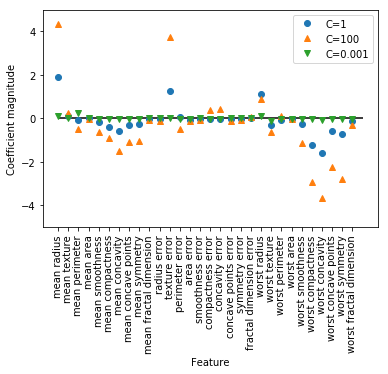

In [13]:
# logistic regressing using L2-regularization

plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


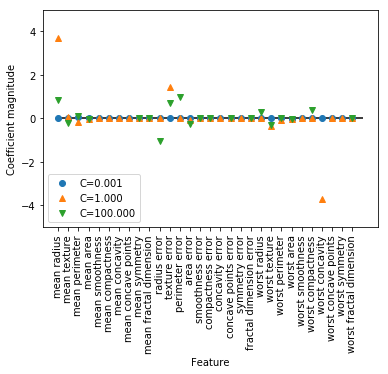

In [14]:
# logistic regressing using L1-regularization

for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
  lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
  print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
  print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
  plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
  
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

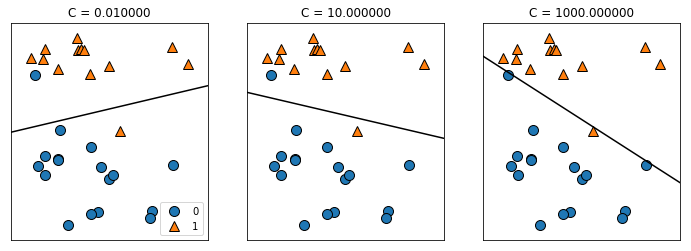

In [15]:
mglearn.plots.plot_linear_svc_regularization()

# Exercises: Apply LogisticRegression on three blob dataset

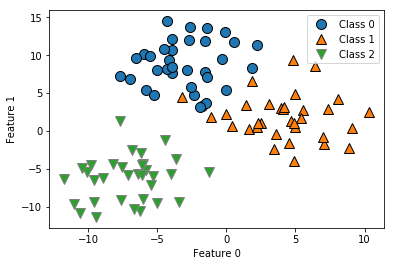

In [16]:
# creates dataset

from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42, cluster_std = 3)     # cluster_std: standard deviation of each clusters
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [0]:
# TO DO: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [0]:
# TO DO: Import LogisticRegression


# TO DO: create a LogisticRegression instance


# TO DO: train on the training set



In [18]:
# TO DO: check coefficients and intercept
print("lr_blobs.coef_: ", lr_blobs.coef_)               # W
print("lr_blobs.intercept_:", lr_blobs.intercept_)      # b

NameError: ignored

In [0]:
# TO DO: print accuracy on training and test sets

